In [62]:
# import os;
# os.listdir('/kaggle/input/sentimen-dataset')

['train.csv', 'test.csv']

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
dataset_izzan_1 = pd.read_csv('../input/sentimen-dataset/train.csv')
dataset_izzan_2 = pd.read_csv('../input/sentimen-dataset/test.csv')

In [65]:
dataset_izzan_1.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [66]:
dataset_izzan_2.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",twitter,0,0,1,0
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,twitter,1,0,0,0
2,Pertama kali denger lagunya enk bgt in dan png...,instagram,0,0,0,0
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",kaskus,0,0,0,0
4,beda kalo disini kalo komplain lgs di bully am...,kaskus,0,0,0,0


In [67]:
dataset = pd.concat([dataset_izzan_1, dataset_izzan_2], ignore_index=True)

In [68]:
dataset

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0
...,...,...,...,...,...,...
7768,"RT @KapalKertasFFI: Meski hanya Show Of Force,...",twitter,0,1,1,1
7769,"Da ky fpi u be, haha RT @jeffrey_stwn: hajar C...",twitter,0,1,1,1
7770,Manahan pantat isi nya lemak semua. Gua suuzon...,instagram,1,0,0,1
7771,"@uzman910 kw tebak sndri la,... kok cmna..biar...",instagram,0,0,0,0


In [69]:
text = dataset['original_text']

In [70]:
import string
import re

def cleanse(data):
    # Lowercase
    data = data.lower()

    # Remove newline
    data = data.replace('\n', ' ')

    # Remove links
    data = re.sub(r'http\S+', '', data)
    data = re.sub(r'bit.ly\S+', '', data)
    data = re.sub(r't.co\S+', '', data)
    data = re.sub(r's.id\S+', '', data)

    # Remove mentions
    data = data.replace("_", "")
    data = re.sub("(@[A-Za-z0-9]+)", " ", data)

    # Remove punctuations
    punct = string.punctuation.replace("<", "").replace(">", "").replace("[", "").replace("]", "")
    translator = str.maketrans(punct, ' ' * len(punct))
    data = data.translate(translator)

    # Remove textual emoji
    data = re.sub(r'<\s?(.*?)\s?>', r'{<\1>}', data)

    # Remove characters between [], <>, or {}
    data = re.sub("[\[].*?[\]]", " ", data)
    data = re.sub(r'<[^>]+>', ' ', data)
    data = re.sub(r'{[^>]+}', ' ', data)

    # Remove numeric digits
    data = re.sub(r'[0-9]', '', data)

    # Strip excess characters on both ends
    data_list = [re.sub(r'([a-z])\1+$', r'\1', token) for token in data.split()]
    data_list = [re.sub(r'^([a-z])\1+', r'\1', token) for token in data_list]
    data = " ".join(data_list)

    # Remove extra space
    data = ' '.join(data.split())

    return data


text_cleaned = [cleanse(sentence) for sentence in text]



In [71]:
dataset['original_text'] = text_cleaned
dataset

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,jabar emng propinsi barokah lehuga n nwoi anji...,kaskus,0,0,0,1
1,kita aja nitizen yang pada kepo toh keluarga b...,instagram,0,0,0,0
2,sidangahok smg sipenista agama n ateknya matin...,twitter,0,1,1,1
3,jkt barusan baca undang ini tetep dibedakan ko...,instagram,0,0,0,0
4,bikin anak mulu lu nof nkaga mikir apa kasian ...,kaskus,0,0,0,0
...,...,...,...,...,...,...
7768,rt meski hanya show of force preman kafir teta...,twitter,0,1,1,1
7769,da ky fpi u be haha rt hajar cina tabok tonjok...,twitter,0,1,1,1
7770,manahan pantat isi nya lemak semua gua suuzon ...,instagram,1,0,0,1
7771,kw tebak sndri la kok cmna biar kw ksh jwbn sa...,instagram,0,0,0,0


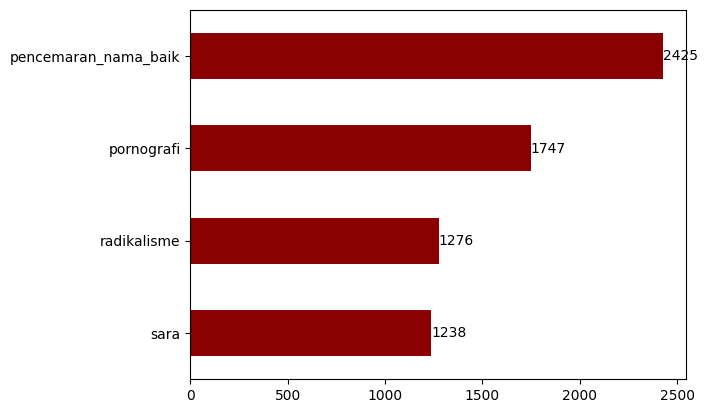

In [72]:
# Data frame Anda (df) dan operasi yang Anda lakukan
ax = (dataset[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()


In [73]:
pencemaran_nama_baik = dataset[(dataset['pencemaran_nama_baik'] == 1) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
sara = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 1) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
radikalisme = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 1) & (dataset['pornografi'] == 0)]
pornografi = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 1)]
dataset = pd.concat([pencemaran_nama_baik,sara,radikalisme,pornografi],ignore_index=True)

dataset

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,jabar emng propinsi barokah lehuga n nwoi anji...,kaskus,0,0,0,1
1,sudah jelas ketuhanan yang maha esa ya berati ...,kaskus,0,0,0,1
2,nlu mau bilang sultan jogja parasit gitu karna...,kaskus,0,0,0,1
3,serang terus taaaaak kalo ga nanti kalian ga d...,kaskus,0,0,0,1
4,pantek induak laki amak ang dek ang jadi menta...,kaskus,0,0,0,1
...,...,...,...,...,...,...
2694,itu buah dada ny bsa ga d pamerin mulu kita yg...,instagram,1,0,0,0
2695,aku keluarin dimana beib oh yeah oh oh ohhrt k...,twitter,1,0,0,0
2696,open vcs and member chat wa buruan ya sayang e...,twitter,1,0,0,0
2697,twit parah rt ikutan dong rt msh bugil dikamar...,twitter,1,0,0,0


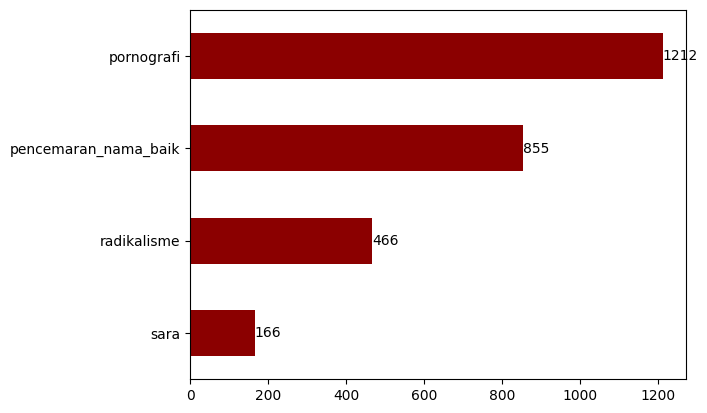

In [74]:
ax = (dataset[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()

**UNDERSAMPLING**

In [75]:
pencemaran_nama_baik = dataset[(dataset['pencemaran_nama_baik'] == 1) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)].head(166)
sara = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 1) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
radikalisme = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 1) & (dataset['pornografi'] == 0)].head(166)
pornografi = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 1)].head(166)
dataset_under = pd.concat([pencemaran_nama_baik,sara,radikalisme,pornografi],ignore_index=True)

dataset_under


,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,jabar emng propinsi barokah lehuga n nwoi anji...,kaskus,0,0,0,1
1,sudah jelas ketuhanan yang maha esa ya berati ...,kaskus,0,0,0,1
2,nlu mau bilang sultan jogja parasit gitu karna...,kaskus,0,0,0,1
3,serang terus taaaaak kalo ga nanti kalian ga d...,kaskus,0,0,0,1
4,pantek induak laki amak ang dek ang jadi menta...,kaskus,0,0,0,1
...,...,...,...,...,...,...
659,yang lagi horny dan sange pengen ngewe ama mem...,twitter,1,0,0,0
660,di indonesia juga banyak unicorn gan npenampil...,kaskus,1,0,0,0
661,foto hot cewek mandi sambil remas toket foto c...,twitter,1,0,0,0
662,ayo say dimulai aja dijilatin memek ya ya say ...,twitter,1,0,0,0


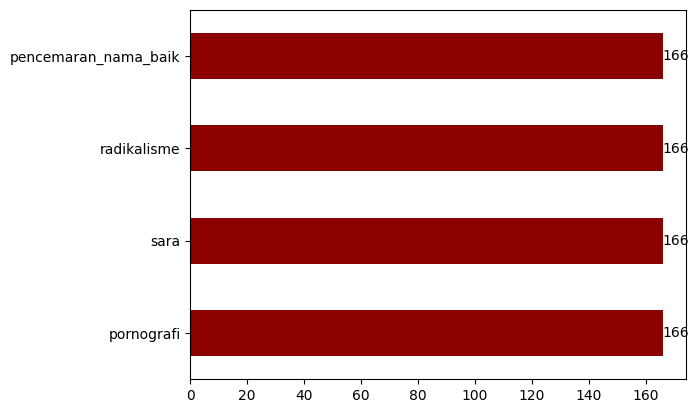

In [76]:
ax = (dataset_under[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()

**MIX SAMPLING**

In [77]:
pencemaran_nama_baik = dataset[(dataset['pencemaran_nama_baik'] == 1) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)].head(500)
sara = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 1) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
sara = pd.concat([sara,sara,sara,sara.head(2)],ignore_index=True)
radikalisme = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 1) & (dataset['pornografi'] == 0)]
radikalisme = pd.concat([radikalisme,radikalisme.head(34)],ignore_index=True)
pornografi = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 1)].head(500)
dataset_mix = pd.concat([pencemaran_nama_baik,sara,radikalisme,pornografi],ignore_index=True)

dataset_mix

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,jabar emng propinsi barokah lehuga n nwoi anji...,kaskus,0,0,0,1
1,sudah jelas ketuhanan yang maha esa ya berati ...,kaskus,0,0,0,1
2,nlu mau bilang sultan jogja parasit gitu karna...,kaskus,0,0,0,1
3,serang terus taaaaak kalo ga nanti kalian ga d...,kaskus,0,0,0,1
4,pantek induak laki amak ang dek ang jadi menta...,kaskus,0,0,0,1
...,...,...,...,...,...,...
1995,sdh siaap tuuh rt masa sch wadu itu mah pengen...,twitter,1,0,0,0
1996,baru baca mt ini mau aja sih lu di mana emang ...,twitter,1,0,0,0
1997,tobaaaat ki tobaaaat rt mau ngewe sama co w tp...,twitter,1,0,0,0
1998,iya sayang empuk bgt toket kamu aku udah nggak...,twitter,1,0,0,0


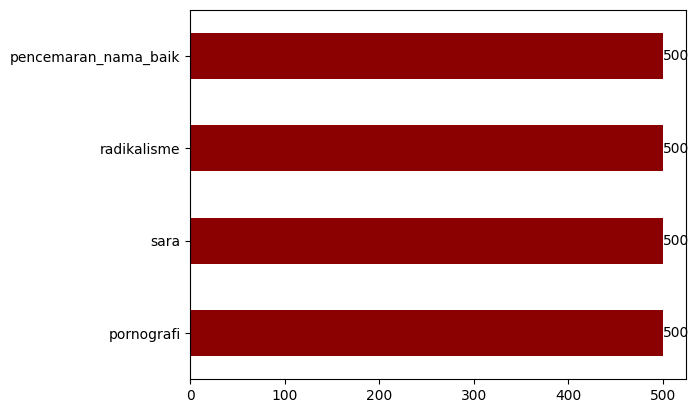

In [78]:
ax = (dataset_mix[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()

In [79]:
pencemaran_nama_baik = dataset[(dataset['pencemaran_nama_baik'] == 1) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
pencemaran_nama_baik = pd.concat([pencemaran_nama_baik,pencemaran_nama_baik.head(345)],ignore_index=True)
sara = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 1) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 0)]
sara = pd.concat([sara,sara,sara,sara,sara,sara,sara,sara.head(38)],ignore_index=True)
radikalisme = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 1) & (dataset['pornografi'] == 0)]
radikalisme = pd.concat([radikalisme,radikalisme,radikalisme.head(268)],ignore_index=True)
pornografi = dataset[(dataset['pencemaran_nama_baik'] == 0) & (dataset['sara'] == 0) & (dataset['radikalisme'] == 0) & (dataset['pornografi'] == 1)].head(1200)
dataset_over = pd.concat([pencemaran_nama_baik,sara,radikalisme,pornografi],ignore_index=True)

dataset_over

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,jabar emng propinsi barokah lehuga n nwoi anji...,kaskus,0,0,0,1
1,sudah jelas ketuhanan yang maha esa ya berati ...,kaskus,0,0,0,1
2,nlu mau bilang sultan jogja parasit gitu karna...,kaskus,0,0,0,1
3,serang terus taaaaak kalo ga nanti kalian ga d...,kaskus,0,0,0,1
4,pantek induak laki amak ang dek ang jadi menta...,kaskus,0,0,0,1
...,...,...,...,...,...,...
4795,patahkan kntolnya n n mad n nudah habis sabun ...,kaskus,1,0,0,0
4796,sabar ya ayu sabarsabar rt anjeng la masi bagu...,twitter,1,0,0,0
4797,assssh uggh memek kamu sempit sayang sh ah nik...,twitter,1,0,0,0
4798,wakakakakaka rt kalo itu baru dicukur fah biar...,twitter,1,0,0,0


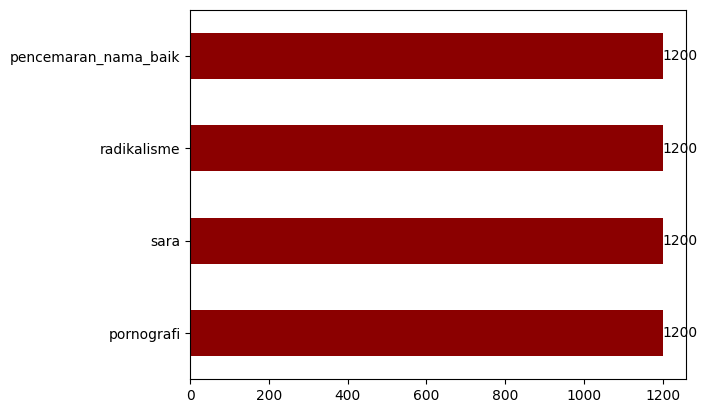

In [108]:
ax = (dataset_over[['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']]
      .sum(axis=0)
      .sort_values()
      .plot(kind='barh', color='darkred'))

# Menambahkan label ke setiap batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()

In [115]:
print(sara['original_text'])

0       kalian teriak ganyang cina usir ahmadiyah musn...
1       stop kambinghitamkan atheis sebagai pelakunya ...
2       nyerang surah dalam al qur an tahun nyerang na...
3       kok dia bisa dengar superman n nposisinya khan...
4       salut dengan dosen satu ini dan pandangan dia ...
                              ...                        
1195    hai dan sobat seperjuangan instagram adalah pr...
1196    ntah demon gitu malah ad yg bilang ganyang cin...
1197    jadi islam yg islami itu yg mana nisis al qaed...
1198    ngapain ilmuwan repot cari gituan si nmacam se...
1199    n nsilakan anda merasa itu nmalah gw trus memb...
Name: original_text, Length: 1200, dtype: object


In [94]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.75 and logs.get('accuracy')>0.75):
      print("\nAkurasi telah mencapai >75%!")
      self.model.stop_training = True
callbacks = myCallback()

Epoch 1/50
68/68 - 7s - loss: 1.1747 - accuracy: 0.4465 - val_loss: 0.8159 - val_accuracy: 0.5889 - 7s/epoch - 100ms/step
Epoch 2/50
68/68 - 4s - loss: 0.5908 - accuracy: 0.8036 - val_loss: 0.4178 - val_accuracy: 0.8630 - 4s/epoch - 52ms/step
Epoch 3/50
68/68 - 3s - loss: 0.2173 - accuracy: 0.9176 - val_loss: 0.5249 - val_accuracy: 0.8500 - 3s/epoch - 51ms/step
Epoch 4/50
68/68 - 3s - loss: 0.1199 - accuracy: 0.9579 - val_loss: 0.4415 - val_accuracy: 0.8630 - 3s/epoch - 50ms/step
Epoch 5/50
68/68 - 4s - loss: 0.0573 - accuracy: 0.9847 - val_loss: 0.5867 - val_accuracy: 0.8704 - 4s/epoch - 56ms/step
Epoch 6/50
68/68 - 4s - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.6055 - val_accuracy: 0.8574 - 4s/epoch - 52ms/step
Epoch 7/50
68/68 - 3s - loss: 0.0268 - accuracy: 0.9931 - val_loss: 0.6504 - val_accuracy: 0.8519 - 3s/epoch - 50ms/step
Epoch 8/50
68/68 - 4s - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.7057 - val_accuracy: 0.8593 - 4s/epoch - 52ms/step
Epoch 9/50
68/68 - 3s - loss: 0

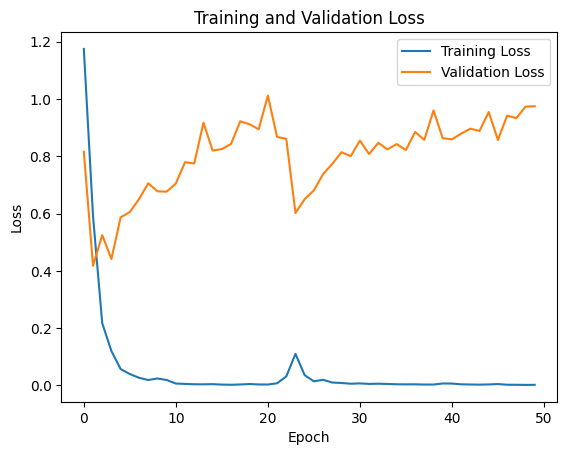

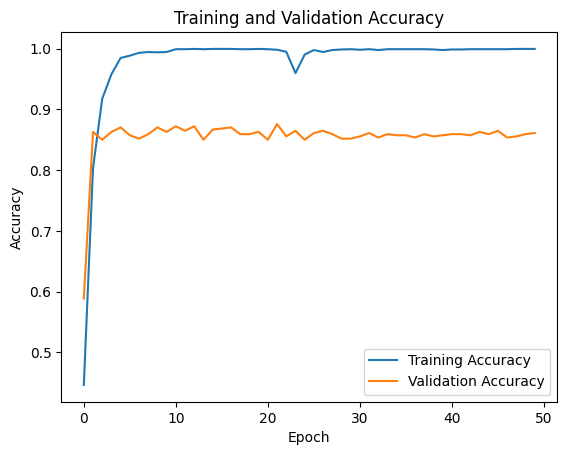

17/17 [==============================] - 0s 16ms/step - loss: 0.9747 - accuracy: 0.8611
Loss: 0.9746735692024231
Accuracy: 0.8611111044883728
Epoch 1/50
17/17 - 4s - loss: 1.3850 - accuracy: 0.2938 - val_loss: 1.3794 - val_accuracy: 0.3835 - 4s/epoch - 263ms/step
Epoch 2/50
17/17 - 1s - loss: 1.3483 - accuracy: 0.4783 - val_loss: 1.2975 - val_accuracy: 0.5564 - 872ms/epoch - 51ms/step
Epoch 3/50
17/17 - 1s - loss: 1.1483 - accuracy: 0.5367 - val_loss: 1.1635 - val_accuracy: 0.4662 - 867ms/epoch - 51ms/step
Epoch 4/50
17/17 - 1s - loss: 0.7480 - accuracy: 0.7269 - val_loss: 0.8721 - val_accuracy: 0.6992 - 866ms/epoch - 51ms/step
Epoch 5/50
17/17 - 1s - loss: 0.3790 - accuracy: 0.8889 - val_loss: 0.7060 - val_accuracy: 0.7519 - 887ms/epoch - 52ms/step
Epoch 6/50
17/17 - 1s - loss: 0.1527 - accuracy: 0.9680 - val_loss: 0.5659 - val_accuracy: 0.8195 - 873ms/epoch - 51ms/step
Epoch 7/50
17/17 - 1s - loss: 0.0413 - accuracy: 0.9944 - val_loss: 0.8154 - val_accuracy: 0.7744 - 872ms/epoch - 51

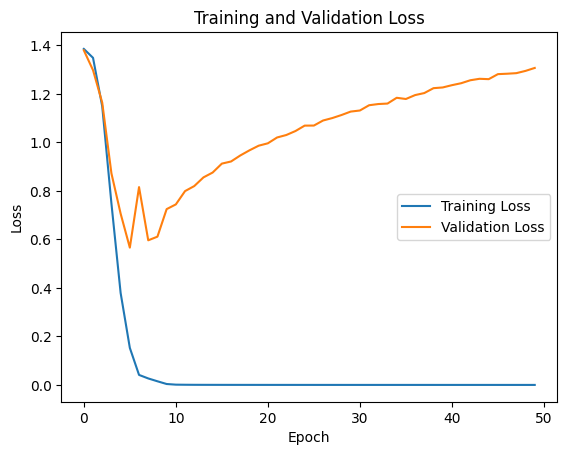

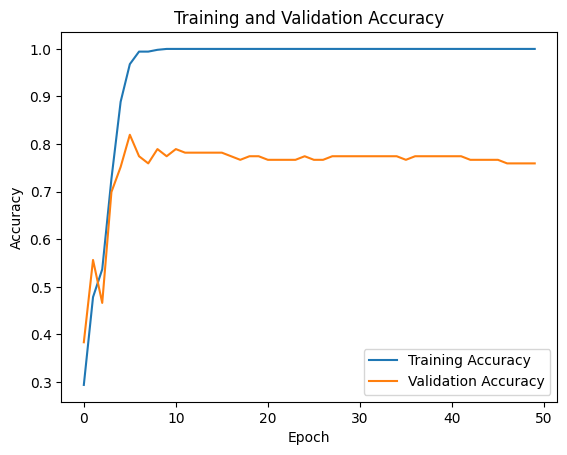

5/5 [==============================] - 0s 13ms/step - loss: 1.3066 - accuracy: 0.7594
Loss: 1.306634783744812
Accuracy: 0.7593985199928284
Epoch 1/50
50/50 - 5s - loss: 1.3406 - accuracy: 0.4038 - val_loss: 1.1781 - val_accuracy: 0.5900 - 5s/epoch - 104ms/step
Epoch 2/50
50/50 - 2s - loss: 0.8849 - accuracy: 0.6325 - val_loss: 0.6678 - val_accuracy: 0.7425 - 2s/epoch - 44ms/step
Epoch 3/50
50/50 - 2s - loss: 0.4441 - accuracy: 0.8338 - val_loss: 0.4877 - val_accuracy: 0.8275 - 2s/epoch - 44ms/step
Epoch 4/50
50/50 - 2s - loss: 0.1846 - accuracy: 0.9488 - val_loss: 0.3804 - val_accuracy: 0.9000 - 2s/epoch - 45ms/step
Epoch 5/50
50/50 - 2s - loss: 0.0549 - accuracy: 0.9900 - val_loss: 0.4027 - val_accuracy: 0.8825 - 2s/epoch - 47ms/step
Epoch 6/50
50/50 - 2s - loss: 0.0292 - accuracy: 0.9931 - val_loss: 0.4467 - val_accuracy: 0.8575 - 2s/epoch - 43ms/step
Epoch 7/50
50/50 - 2s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.4514 - val_accuracy: 0.8925 - 2s/epoch - 45ms/step
Epoch 8/50
50

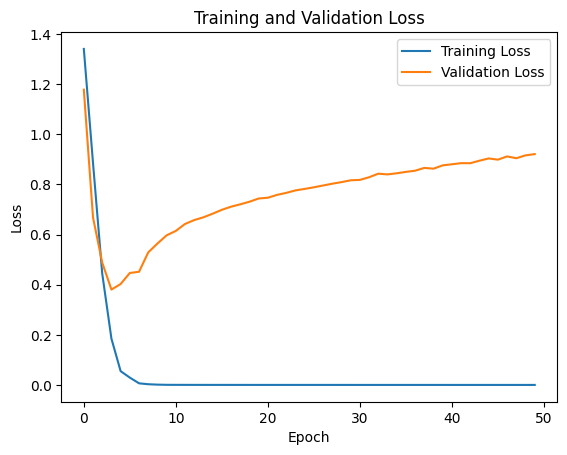

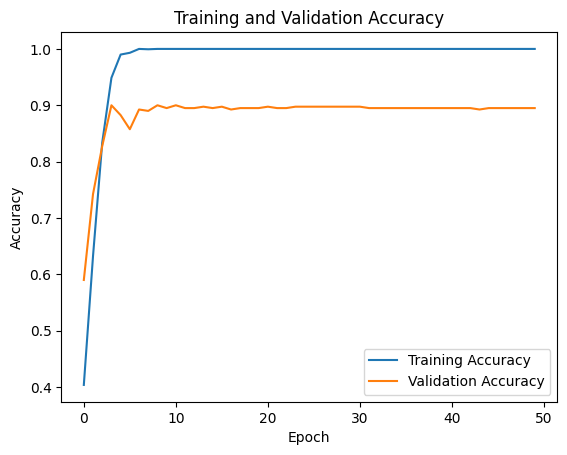

13/13 [==============================] - 0s 15ms/step - loss: 0.9209 - accuracy: 0.8950
Loss: 0.9209491014480591
Accuracy: 0.8949999809265137
Epoch 1/50
120/120 - 8s - loss: 0.9894 - accuracy: 0.5628 - val_loss: 0.4215 - val_accuracy: 0.8719 - 8s/epoch - 68ms/step
Epoch 2/50
120/120 - 5s - loss: 0.2050 - accuracy: 0.9385 - val_loss: 0.1797 - val_accuracy: 0.9417 - 5s/epoch - 42ms/step
Epoch 3/50
120/120 - 5s - loss: 0.0559 - accuracy: 0.9849 - val_loss: 0.1064 - val_accuracy: 0.9740 - 5s/epoch - 42ms/step
Epoch 4/50
120/120 - 5s - loss: 0.0197 - accuracy: 0.9948 - val_loss: 0.1321 - val_accuracy: 0.9719 - 5s/epoch - 42ms/step
Epoch 5/50
120/120 - 5s - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.1576 - val_accuracy: 0.9729 - 5s/epoch - 44ms/step
Epoch 6/50
120/120 - 5s - loss: 0.0356 - accuracy: 0.9924 - val_loss: 0.1576 - val_accuracy: 0.9625 - 5s/epoch - 43ms/step
Epoch 7/50
120/120 - 5s - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.1452 - val_accuracy: 0.9698 - 5s/epoch - 43ms/st

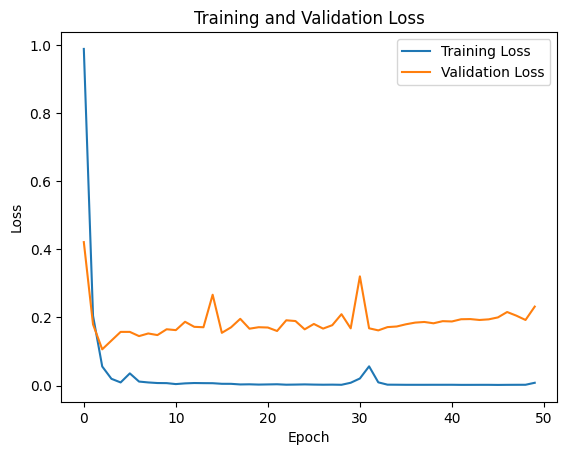

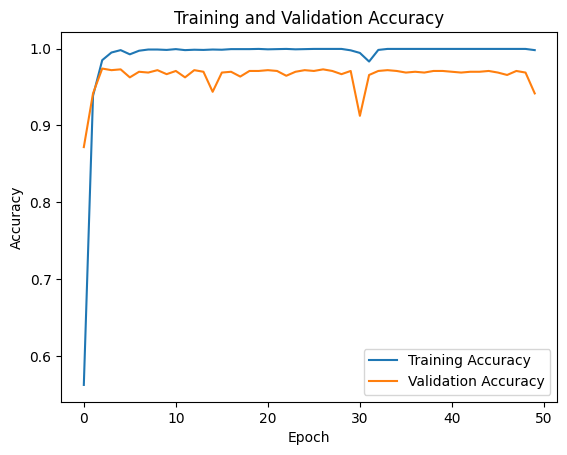

30/30 [==============================] - 1s 16ms/step - loss: 0.2319 - accuracy: 0.9417
Loss: 0.23194128274917603
Accuracy: 0.9416666626930237


In [96]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
import tensorflow as tf
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

data = [dataset,dataset_under,dataset_mix,dataset_over]

max_words = 5000
max_len = 100

for df in data:
    y_bin = df[['pencemaran_nama_baik', 'radikalisme', 'sara', 'pornografi']].values
# Tokenization and Padding
    tokenizer = Tokenizer(num_words=max_words, split=' ')
    tokenizer.fit_on_texts(df['original_text'])
    X_seq = tokenizer.texts_to_sequences(df['original_text'])
    X_pad = pad_sequences(X_seq, maxlen=max_len)

    # MultiLabelBinarizer
#     mlb = MultiLabelBinarizer()
#     y_bin = mlb.fit_transform(df['labels'])

    # Train-test split
    X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_pad, y_bin, test_size=0.2,stratify=y_bin,random_state=123)


    # Model Definition
#     model = Sequential()
#     model.add(Embedding(max_words, 128, input_length=max_len))
#     model.add(SpatialDropout1D(0.2))
#     model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, name = "LSTM_layer"))
#     num_classes = len(mlb.classes_)
#     model.add(Dense(num_classes, activation='sigmoid'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=6000, output_dim=16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(4, activation='sigmoid')
        # tf.keras.layers.Dropout(0.5)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    # Model Training
    history = model.fit(X_train, y_train_bin, epochs=50, batch_size=32, validation_data=(X_test, y_test_bin),verbose=2)

    # Plot Loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Model Evaluation
    loss, accuracy = model.evaluate(X_test, y_test_bin)
    print("Loss:", loss)
    print("Accuracy:", accuracy)


In [142]:
text_input = "halo cina islam jelek banget gausah ikut campur"

# Tokenisasi teks input
input_seq = tokenizer.texts_to_sequences([text_input])
input_pad = pad_sequences(input_seq, maxlen=max_len)

# Prediksi menggunakan model yang telah dilatih
threshold = 0.5  # Misalnya, gunakan threshold 0.5

# Prediksi menggunakan model yang telah dilatih
predictions = model.predict(input_pad)

# Mendapatkan nama label
predicted_labels = ['pencemaran_nama_baik', 'radikalisme', 'sara', 'pornografi']

# Memilih label dengan nilai prediksi tertinggi
max_index = predictions[0].argmax()
max_prediction = predictions[0][max_index]
predicted_label = predicted_labels[max_index]

if max_prediction < threshold:
    predicted_label = "Tidak Tahu Kok Tanya guehh"
    
print("presentase: ",max_prediction)
print("Label yang diprediksi: ",predicted_label)

1/1 [==============================] - 0s 26ms/step
presentase:  0.9299229
Label yang diprediksi:  radikalisme
